## <b>TOPIC: Benefit or Loyalty: An empirical research from 2021 referendum in Taiwan</b>

Team member:   
Lee, Iris (irislee@andrew.cmu.edu)  
Chang, Joanna (joannac2@andrew.cmu.edu)  
Lu, Shawn (shaogul@andrew.cmu.edu)  


### <b>1. Question</b>

Political polarization is a worldwide phenomenon that the democratic principles of mutual tolarence and understanding are undermined. In the polarization context, do citizens follow the policy position of the parties they aligned with, or they will rationaly calculate the potential benefit to decide whether they should support a policy or not? More and more research found that political parties play the decisive role in shaping citizens policy attitudes.

Taiwan, one of the most polarized democracies in the world, is a special case, because it is not the left and right wing ideology that divide our citizens into two groups, the national identity is the driving force of the political polarization in Taiwan. Therefore, political parties' position on a economic or trade policy does not depend on the ideology they have. In this context, citizens who follow their parties position could actually contradict with their own economic benefit.

As a result, the question we wanna ask is: Does the benefit matter more or the loyalty dominates individuals dicision making process in the polarized political environment?

### <b>2. Background:</b>
We choose Taiwan's 2021 national referendum result in township level as our case. Specifically, we analyze the relationship between the support rate of banning pork import from the U.S. and the local pork industry and the local political alignment (measureed by the parties vote share in the 2020 presidential election).

There are multiple advantages of this case. First, the electoral result was similar to a public opinion survey which cover the whole population in a country. Therefore, the referendum results could be best approach the "real" value of public opinion. Secondly, the data of the number of pig farms is accessible, and other demographic variables in township level are also easy to collect. Thirdly, as we mentioned above, the two major parties in Taiwan do not have different economic position on the left-right spectrum. Therefore, individuals support to a party is unlikely to covariate with their economic position. Finally, we collect the township level data which are the "real life" data. This could minimize the common issues from survey data, such as self-reporting bias and selection bias etc.


<b>The 2021 National Referendum in Taiwan: </b>  
<u>Proposal 17:</u>   
Do you agree to restart the operation of the Fourth Nuclear Power Plant for commercial electricity generation?  


*   Nuclear Safety (Earthquake) / Energy Stability
*   Old issue since 2000
*   It is a partisan issue
  
<u>Proposal 18:</u>   
Do you agree that the government should completely ban the importation of pork, offal, and other related products from pigs injected with ractopamine?  

*   Food safety / Trade policy / International relation
*   Ractopamine: used as a feed additive to develop leanness and increase feed conversion efficiency in different farm animals
*   Proposed by a opposition legislature

<u>Proposal 19:</u>   
Do you agree that public referendum proposals should be held on the same day as nationwide elections if the referendum is announced and finalized within six months prior to such elections, under the conditions set by referendum regulations?  

*   Electoral participation
*   The current law, which was  legislated by the ruling party, do not allow elections and referendums being hold on the same day
*   Proposed by a opposition legislature

<u>Proposal 20:</u>   
Do you agree to relocate the third liquefied natural gas (LNG) receiving station from Taoyuan’s Guantang Industrial Zone to areas away from nearshore and offshore waters?

*   Environmental protection / energy stability
*   Provide the gas usage of power stations
*   The construction could destroy the coral eco-system


### <b>3. Hypotheses</b>
<b>Trying to answer the questions we raised, we are proposing the following hypotheses:</b>


*   The number of pig farms in a county will increase the agree rate of the pork import ban, but not other referendums
     *  The import of pork has negative impact to their economic benefits
*   The number of cow farms in a county will not affect the agree rate of pork import ban and other referendums

     *  These issues do not related to the economic benefits of cow industry
     *  Beef as substitute of pork, will cow industry be affected by the import of pork?

*   The higher the support rates of the ruling party (Demo Progressive) in a county, the lower agree rates in four referendums

     *   To align with the position of ruling party

*   The higher the support rates of the main opposition party (Nationalist) in a county, the higher agree rates in four referendums
     *   These issues do not related to the economic benefits of cow industry

### <b>4. Data Source</b>
<b>We obtained our data primariy through Taiwan's official websites. The data source are listed as follows:</b>

a. Taiwan Agricultural Knowledge Portal: Number of pig / cow farms in each town in 2021   
&nbsp;&emsp;https://kmweb.moa.gov.tw/subject/subject.php?id=734&page=2&display_num=20

b. the 2021 national referendums: Central Election Commission.  
&nbsp;&emsp;https://db.cec.gov.tw/ElecTable/Election?type=President

c. the 2020 presidential election result: Central Election Commission.  
&nbsp;&emsp;https://db.cec.gov.tw/ElecTable/Election?type=President

d. Government Open Data Platform: Income of each town in 2021   
&nbsp;&emsp;https://data.gov.tw/dataset/103066

e. Department of Household Registration: Population and Population Density of each town in 2021   
&nbsp;&emsp;https://www.ris.gov.tw/app/en/3910

f. Socioeconomic Data Service Platform: Education levels of each town in 2021   
&nbsp;&emsp;https://segis.moi.gov.tw/STATCloud/QueryInterfaceView?COL=7MfCfxIfzElmpDq3ihu4IA%253d%253d&MCOL=UOs2QWMZZGxwvYT3XKtxGA%253d%253d

g. Government Open Data Platform: Boundaries of Towns in Taiwan  
&nbsp;&emsp;https://data.nat.gov.tw/dataset/7441


### <b>5. Data Wrangling</b>

#### a. Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LinearSegmentedColormap
from geopandas import GeoDataFrame
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

#### b. Translator for county and township

In [2]:
# https://www.post.gov.tw/post/download/county_h.xls
counties = pd.read_excel('county_h.xls', header=None)
counties.rename(columns={0: 'code', 1: 'mandarin', 2: 'english'}, inplace=True)

# this dataframe contain a column which contain the mandarin of county/city + town
# for example, 台北市文山區, which is Taipei City, Wenshan Dist.
# I need to seperate this column to two columns contain county/city, and town respectively.
# however, there are two types of local government: city (市) or county （縣）
# therefore, i cannot split the data once, so i create two temperal dataframe to store city and county data respectively
tempCounty = counties[['mandarin', 'english']].copy()
tempCity = counties[['mandarin', 'english']].copy()

# then i split the column with '縣' (county) and '市' (city)
# I split county first because in a County, there could be a township whos name contain '市' which means city,
# but it is imposible that any township has a word of '縣' (county)
tempCounty[['county_m', 'town_m']] = counties['mandarin'].str.split('縣', expand=True)
tempCity[['county_m', 'town_m']] = tempCounty['county_m'].str.split('市', n=1, expand=True)

# those who cannot be split into two columns means that data do not belong to county or city
# so i just drop them
tempCounty.dropna(inplace=True)
tempCity.dropna(inplace=True)
tempCounty.drop('mandarin', axis=1, inplace=True)
tempCity.drop('mandarin', axis=1, inplace=True)

# I concate the '縣' (county) and '市' (city) back
tempCounty['county_m'] = tempCounty['county_m'] + '縣'
tempCity['county_m'] = tempCity['county_m'] + '市'

# I print their shape
# print(f'these two dataframes have {tempCounty.shape[0] + tempCity.shape[0]} rows in total')
# there are 368 towns in Taiwan, these two dataframes have 368 rows in total, which means the data could be correct

# I concat these two temperal dataframe into a new one
newCounties = pd.concat([tempCity, tempCounty])

# then I need to split 'english' column
newCounties[['town_e', 'county_e']] = newCounties['english'].str.split(', ', expand=True)
newCounties.drop('english', axis=1, inplace=True)

# I use this newCounties dataframe to create a dictionary to be a translator later for our referendum data
town_dict = dict(zip(newCounties['town_m'], newCounties['town_e']))
county_dict = dict(zip(newCounties['county_m'], newCounties['county_e']))
countyList = list(county_dict.keys())

county_dict['臺北市'] = 'Taipei City'
county_dict['臺中市'] = 'Taichung City'
county_dict['臺南市'] = 'Tainan City'
county_dict['臺東縣'] = 'Taitung County'

#### c. Data Cleaning and merging
(1) Number 17, 18, 19, and 20 referendum results  
(2) The 2020 presidential election results  
(3) Number of live stocks (pig & cow)  
(4) Income  
(5) Education Level  
(6) Age   
(7) Gender
(8) Population and population density

In [3]:
mergeData = pd.DataFrame()

(1) Number 17, 18, 19, and 20 referendum results    

In [4]:
# referendum data cleaning
sheetNames = ['第１７案', '第１８案', '第１９案', '第２０案']
forFileName = {'第１７案': 'no17', '第１８案': 'no18', '第１９案': 'no19', '第２０案': 'no20'}
# these names mean Referendum Number 17, 18, 19, and 20

for sheet in sheetNames:
        combineData = pd.DataFrame()
        for county in countyList:
                data = pd.read_excel('表5-'+county+'-全國性公民投票得票數一覽表(投開票所).xls', sheet_name=sheet, header=1)

                # adjust the column names and drop rows and columns that doesn't matter for us
                # we delete the column:
                data.rename(columns={'得票情形': data.loc[0, '得票情形'], 'Unnamed: 4': data.loc[0, 'Unnamed: 4']}, inplace=True)
                data.drop([0, 1, 2, 3], inplace=True)
                data.drop(['投開票所別', 'D\n已領未投票數\nD=E-C', 'E\n發出票數\nE=C+D', 'F\n用餘票數'], axis=1, inplace=True)
                data.reset_index(drop=True, inplace=True)

                # translate the column names from mandarine to English
                data.rename(columns={'鄉(鎮、市、區)別': 'town',
                                '村里別': 'village',
                                '1\n同意': f'{forFileName[sheet]}_agreeVotes',
                                '2\n不同意': f'{forFileName[sheet]}_disagreeVotes',
                                'A\n有效票數\nA=1+2': f'{forFileName[sheet]}_validVotes',
                                'B\n無效票數': f'{forFileName[sheet]}_invalidVotes',
                                'C\n投票數\nC=A+B': f'{forFileName[sheet]}_totVotes',
                                'G\n投票權人數\nG=E+F': 'ref_eligibleVoters',
                                'H\n投票率\nH=C÷G\n(%)': f'{forFileName[sheet]}_voterTurnout'}, inplace=True)

                # clean NaN data
                data['town'] = data['town'].ffill()
                data.dropna(subset=['village'], inplace=True)
                data.reset_index(drop=True, inplace=True)

                # aggregate the data from the poll-station-level to district or town-level
                data = data.groupby('town', as_index=False)[[f'{forFileName[sheet]}_agreeVotes',
                                                             f'{forFileName[sheet]}_disagreeVotes',
                                                             f'{forFileName[sheet]}_validVotes',
                                                             f'{forFileName[sheet]}_invalidVotes',
                                                             f'{forFileName[sheet]}_totVotes',
                                                             'ref_eligibleVoters']].sum()
                data.insert(loc=0, column='city/county', value=county_dict[county])
                data['town'] = data['town'].str.strip()
                data[f'{forFileName[sheet]}_voterTurnout'] = round(data[f'{forFileName[sheet]}_totVotes'] / data['ref_eligibleVoters'] * 100, 4)

                # translate the districts or towns from mandarin to English
                # set town as the index
                data['town'] = data['town'].replace(town_dict)
                combineData = pd.concat([combineData, data])

        # oops, there are 5 townships haven't been translated
        # I just do that here
        combineData['town'] = combineData['town'].replace({'臺東市': 'Taitung City',
                                                        '霧臺鄉': 'Wutai Township',
                                                        '員林市': 'Yuanlin City',
                                                        '頭份市': 'Toufen City',
                                                        '臺西鄉': 'Taixi Township'})
        # combineData.to_csv(f'{forFileName[sheet]}_referendum.csv', index=False, encoding='utf-8-sig')
        if mergeData.empty:
                mergeData = combineData
        else:
                mergeData = pd.merge(mergeData, combineData, on=['city/county', 'town', 'ref_eligibleVoters'], how='inner')

        print(f'{forFileName[sheet]}_referendum file is merged')

no17_referendum file is merged
no18_referendum file is merged
no19_referendum file is merged
no20_referendum file is merged


(2) The 2020 presidential election results  

In [5]:
# the 2020 presidential election results data cleaning
combineData = pd.DataFrame()
for county in countyList:
    data = pd.read_excel('總統-A05-2-候選人得票數一覽表(' + county +').xls', header=1)

    data.rename(columns={'各組候選人得票情形': data.loc[0, '各組候選人得票情形'],
                        'Unnamed: 2': data.loc[0, 'Unnamed: 2'],
                        'Unnamed: 3': data.loc[0, 'Unnamed: 3']}, inplace=True)

    data.drop([0, 1, 2, 3], inplace=True)
    data.drop(['已領未投票數\nD\nD=E-C', '發出票數E\nE=C+D', '用餘票數F'], axis=1, inplace=True)
    data.reset_index(drop=True, inplace=True)

    data.rename(columns={'鄉(鎮、市、區)別': 'town',
                    '(1)\n宋楚瑜\n余湘': '20pr_peopleFirst',
                    '(2)\n韓國瑜\n張善政': '20pr_nationalist',
                    '(3)\n蔡英文\n賴清德': '20pr_demoProgressive',
                    '有效票數A\nA=1+2+...+N': '20pr_validVotes',
                    '無效票數B': '20pr_invalidVotes',
                    '投票數C\nC=A+B': '20pr_totVotes',
                    '選舉人數G\nG=E+F': '20pr_eligibleVoters',
                    '投票率H\nH=C÷G': '20pr_voterTurnout'}, inplace=True)

    data.insert(loc=0, column='city/county', value=county_dict[county])
    data['town'] = data['town'].str.strip()
    data['town'] = data['town'].replace(town_dict)
    combineData = pd.concat([combineData, data])

combineData['town'] = combineData['town'].replace({'臺東市': 'Taitung City',
                                                        '霧臺鄉': 'Wutai Township',
                                                        '員林市': 'Yuanlin City',
                                                        '頭份市': 'Toufen City',
                                                        '臺西鄉': 'Taixi Township'})

# combineData.to_csv(f'2020_presidential.csv', index=False)
mergeData = pd.merge(mergeData, combineData, on=['city/county', 'town'], how='inner')

(3) Number of live stocks (pig & cow)  

In [6]:
# Livestock data cleaning
lsfarm = pd.read_excel('Number of Livestock Farms and Stock Volume.ods', engine = 'odf', sheet_name = None)
lsdf = pd.DataFrame({'City':[], 'Town':[], 'pigFarm':[], 'cowFarm':[]})
cowdict = {'cowFarm':[]}
pd.set_option('future.no_silent_downcasting', True)

# For each city, get the number of pig farms and cow farms in each town
for k, v in lsfarm.items():
    # Fing the first empty row, which is the end of the pig's data
    pig_end = v[v.isna().all(axis = 1)].index.min()
    for r in range(5, pig_end):
        lsdf.loc[len(lsdf)] = [k, v.iloc[r, 0], v.iloc[r, 2], 0]
    lsdf['pigFarm'] = lsdf['pigFarm'].replace('-', 0)

    # Find the second empty row, which is the end of the cow's data
    cow_end = v[v.isna().all(axis = 1)].index[1]
    for r in range(pig_end + 6, cow_end):
        cowdict['cowFarm'].append(v.iloc[r, 2])
cowdf = pd.DataFrame(cowdict)
# Replace the empty
cowdf['cowFarm'] = cowdf['cowFarm'].replace('-', 0)
lsdf['cowFarm'] = cowdf
print(lsdf['pigFarm'].sum()) # 6308 checked
print(lsdf['cowFarm'].sum()) # 1693 checked
print(lsdf.shape) # 368
lsdf.head()

6308
1693
(368, 4)


,City,Town,pigFarm,cowFarm
0,新北市,板橋區,0,0
1,新北市,三重區,0,0
2,新北市,中和區,2,0
3,新北市,永和區,0,0
4,新北市,新莊區,0,0


(4) Income  

In [7]:
# income data cleaning

income = pd.read_csv('Income for Counties and Cities.csv')
incomedf = income[['縣市別', '納稅單位(戶)', '綜合所得總額']]
incomedf.columns = ['City', 'unit', 'totalIncome']
incomedf['Town'] = incomedf['City'].str[3:]
incomedf['City'] = incomedf['City'].str[:3]

income_gp = incomedf.groupby(['City', 'Town'])[['unit', 'totalIncome']].sum()
income_gp['avgIncome'] = income_gp['totalIncome'] * 1000 / income_gp['unit']
income_gp = income_gp.reset_index().loc[:,['City', 'Town', 'avgIncome']]
incomedf = income_gp

/var/folders/k0/n2zpdn2j69ldgf48_6t5l9400000gn/T/ipykernel_89757/3107088996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomedf['Town'] = incomedf['City'].str[3:]
/var/folders/k0/n2zpdn2j69ldgf48_6t5l9400000gn/T/ipykernel_89757/3107088996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomedf['City'] = incomedf['City'].str[:3]


(5) Education Level  

In [8]:
# education data cleaning

edu = pd.read_csv('Education for Counties and Cities.csv', encoding = 'Big5', header = 1)
edu['postSecondary'] = edu.iloc[:,4:7].sum(axis = 1)
edu['totalPopulation'] = edu.iloc[:,4:13].sum(axis = 1)
edu['postSecondaryRt'] = edu['postSecondary'] / edu['totalPopulation'] * 100
edudf = edu.loc[:, ['縣市名稱', '鄉鎮市區名稱','postSecondaryRt']]
edudf.columns = ['City', 'Town', 'postSecondaryRt']

In [9]:
m1 = pd.merge(lsdf, edudf, on = ['City', 'Town'], how = 'left')
m2 = pd.merge(m1, incomedf, on = ['City', 'Town'], how = 'left')
pd.set_option('display.max_rows', None)

m2.rename(columns={'City': 'city/county',
                   'Town': 'town'}, inplace=True)

m2['city/county'] = m2['city/county'].replace(county_dict)
m2['town'] = m2['town'].replace(town_dict)
m2['town'] = m2['town'].replace({'臺東市': 'Taitung City',
                                '霧臺鄉': 'Wutai Township',
                                '員林市': 'Yuanlin City',
                                '頭份市': 'Toufen City',
                                '臺西鄉': 'Taixi Township'})

mergeData = pd.merge(mergeData, m2, on=['city/county', 'town'], how='inner')

(6) Age  
(7) Gender   
(8) Population and population density   

In [10]:
pop = pd.read_excel('Population and Gender_2021.xlsx', index_col=2)
pop.columns = pop.iloc[3]
pop = pop.iloc[5:-1]
pop.insert(0, 'City', '')

pop.iloc[0:30, pop.columns.get_loc('City')] = '新北市'
pop.iloc[30:43, pop.columns.get_loc('City')] = '臺北市'
pop.iloc[43:57, pop.columns.get_loc('City')] = '桃園市'
pop.iloc[57:87, pop.columns.get_loc('City')] = '臺中市'
pop.iloc[87:125, pop.columns.get_loc('City')] = '臺南市'
pop.iloc[125:164, pop.columns.get_loc('City')] = '高雄市'
pop = pop.drop(pop.index[164], axis=0) # Drop the subtotal in the middle of the dataset
pop.iloc[164:177, pop.columns.get_loc('City')] = '宜蘭縣'
pop.iloc[177:191, pop.columns.get_loc('City')] = '新竹縣'
pop.iloc[191:210, pop.columns.get_loc('City')] = '苗栗縣'
pop.iloc[210:237, pop.columns.get_loc('City')] = '彰化縣'
pop.iloc[237:251, pop.columns.get_loc('City')] = '南投縣'
pop.iloc[251:272, pop.columns.get_loc('City')] = '雲林縣'
pop.iloc[272:291, pop.columns.get_loc('City')] = '嘉義縣'
pop.iloc[291:325, pop.columns.get_loc('City')] = '屏東縣'
pop.iloc[325:342, pop.columns.get_loc('City')] = '臺東縣'
pop.iloc[342:356, pop.columns.get_loc('City')] = '花蓮縣'
pop.iloc[356:363, pop.columns.get_loc('City')] = '澎湖縣'
pop.iloc[363:371, pop.columns.get_loc('City')] = '基隆市'
pop.iloc[371:375, pop.columns.get_loc('City')] = '新竹市'
pop.iloc[375:378, pop.columns.get_loc('City')] = '嘉義市'
pop = pop.drop(pop.index[378], axis=0) # Drop the subtotal in the middle of the dataset
pop.iloc[378:385, pop.columns.get_loc('City')] = '金門縣'
pop.iloc[385:390, pop.columns.get_loc('City')] = '連江縣'

# Rename Columns
pop.columns.values[1] = 'Gender'
pop.columns.values[2] = 'Area Code'
pop.columns.values[3] = 'Population'

# Generate new column names for 4th to 102nd columns
new_column_names = [str(i) for i in range(99)]

# Assign new names to 4th to 102nd columns
pop.columns.values[4:103] = new_column_names

# Assign the last column into '100+'
pop.columns.values[-1] = '100+'

# Change the data type of 3rd to the last columns into int
# Select columns from the 3rd column onward
columns_to_convert = pop.columns[3:]

# Convert the selected columns to integers
pop[columns_to_convert] = pop[columns_to_convert].astype(int)

# Create a mapping of 'Area Code' to 'city' for rows where Gender='男'
city_mapping = pop.loc[pop['Gender'] == '男', ['Area Code', 'City']].drop_duplicates().set_index('Area Code')['City']
# Assign the 'city' values to rows where Gender='女' based on the 'Area Code'
pop.loc[pop['Gender'] == '女', 'City'] = pop.loc[pop['Gender'] == '女', 'Area Code'].map(city_mapping)

# Reset the index and make it the first column
pop = pop.reset_index()
pop.rename(columns={'index': 'Town'}, inplace=True)

# Drop rows with subtotal data
# Drop rows where 'Town' is equal to 'City'
pop = pop[pop['Town'] != pop['City']]

# Reset the index after filtering if necessary
pop = pop.reset_index(drop=True)

# Drop rows with NaN value
pop = pop.dropna()

# Reorder the columns to switch 'Town' and 'City'
pop = pop[['City', 'Town'] + [col for col in pop.columns if col not in ['City', 'Town']]]

# Ensure all column names are strings
pop.columns = pop.columns.astype(str)

# Group male data
male_data = (
    pop[pop['Gender'] == '男']
    .groupby(['Area Code', 'City', 'Town'])
    .agg(
        {'Population': 'sum', **{col: 'sum' for col in pop.columns[5:]}}
        #{'Population': 'sum', **{col: 'sum' for col in pop.columns if col.isdigit()}}
    )
    .add_suffix(' (M)')
)

# Group female data
female_data = (
    pop[pop['Gender'] == '女']
    .groupby(['Area Code', 'City', 'Town'])
    .agg(
        {'Population': 'sum', **{col: 'sum' for col in pop.columns[5:]}}
    )
    .add_suffix(' (F)')
)

# Merge male and female data
popall = male_data.reset_index().merge(
    female_data.reset_index(),
    on=['Area Code', 'City', 'Town'],
    how='outer'
)

# Insert 'Population(Total)' column at position 3 (before 'Population (M)')
popall.insert(3, 'Population(Total)', popall['Population (M)'] + popall['Population (F)'])

In [11]:
# Aggregate the population aged 15 to 64 into the Working Age Population column, and the population aged 65 and older into the Old Age Population column
## Create list of Working Age Population for Males
working_age_cols_M = [col for col in popall.columns if col.endswith('(M)') and col.split()[0].isdigit() and 15 <= int(col.split()[0]) <= 64]

## Create list of Old Age Population for Males
old_age_cols_M = [col for col in popall.columns if col.endswith('(M)') and col.split()[0].isdigit() and int(col.split()[0]) > 64]
additional_cols = ['99.0 (M)', '100+ (M)'] # Manually add the additional columns '99.0 (M)' and '100+ (M)' if they exist in the DataFrame
old_age_cols_M.extend([col for col in additional_cols if col in popall.columns])

## Create list of Working Age Population for Females
working_age_cols_F = [col for col in popall.columns if col.endswith('(F)') and col.split()[0].isdigit() and 15 <= int(col.split()[0]) <= 64]

## Create list of Old Age Population for Females
old_age_cols_F = [col for col in popall.columns if col.endswith('(F)') and col.split()[0].isdigit() and int(col.split()[0]) > 64]
additional_cols = ['99.0 (F)', '100+ (F)']# Manually add the additional columns '99.0 (M)' and '100+ (M)' if they exist in the DataFrame
old_age_cols_F.extend([col for col in additional_cols if col in popall.columns])

## Create a new column 'sex_ratio' = column AP / column EN
popall['sex_ratio'] = popall['Population (M)'] / popall['Population (F)']
popall['femaleRT'] = popall['Population (F)'] / popall['Population(Total)'] * 100

## Create a new column 'WorkingAgePopulation' = sum of working_age_cols_M and working_age_cols_F
popall['WorkingAgePopulation'] = popall[working_age_cols_M].sum(axis=1) + popall[working_age_cols_F].sum(axis=1)

## Create a new column 'OldAgePopulation' = sum of old_age_cols_M and old_age_cols_F
popall['OldAgePopulation'] = popall[old_age_cols_M].sum(axis=1) + popall[old_age_cols_F].sum(axis=1)

## Insert the new columns before 'Population (M)'
population_index = popall.columns.get_loc('Population (M)')
popall.insert(population_index, 'sex_ratio', popall.pop('sex_ratio'))
popall.insert(population_index + 1, 'WorkingAgePopulation', popall.pop('WorkingAgePopulation'))
popall.insert(population_index + 2, 'OldAgePopulation', popall.pop('OldAgePopulation'))

## Remove columns with population of each age
exclude_columns = list(range(8, 109)) + list(range(110, 211))  # 排除的索引
selected_columns = [col for i, col in enumerate(popall.columns) if i not in exclude_columns]

## Replace the original dataframe with the new one
popall = popall[selected_columns]
popall.head()

nan,Area Code,City,Town,Population(Total),sex_ratio,WorkingAgePopulation,OldAgePopulation,Population (M),Population (F),femaleRT
0,9007010,連江縣,南竿鄉,7657,1.291143,5678,1029,4315,3342,43.646337
1,9007020,連江縣,北竿鄉,2998,1.369960,2345,406,1733,1265,42.194797
2,9007030,連江縣,莒光鄉,1496,1.710145,1145,247,944,552,36.898396
3,9007040,連江縣,東引鄉,1494,1.593750,1183,141,918,576,38.554217
4,9020010,金門縣,金城鎮,42845,0.991124,31785,6965,21327,21518,50.222896


In [12]:
# Read Density Data
density = pd.read_excel('Population Density_2021.xlsx', sheet_name='110_clean')
density['Town'] = density['Town'].str.replace('※', '')
# Strip whitespace for both DataFrames
popall['Town'] = popall['Town'].str.strip()
density['Town'] = density['Town'].str.strip()

popall['Town'] = popall['Town'].replace(' ', '')
density['Town'] = density['Town'].replace('　', '')
# Identify unmatched towns
unmatched = set(popall['Town']) - set(density['Town'])

town_mapping = {
    '中\u3000區':'中區',
    '北\u3000區':'北區',
    '南\u3000區':'南區',
    '東\u3000區':'東區',
    '西\u3000區':'西區',
}

# Use this mapping to replace values in density DataFrame
density['Town'] = density['Town'].replace(town_mapping)

density['City'] = density['City'].str.replace('台', '臺')

m1 = pd.merge(popall, density, on = ['City', 'Town'], how = 'left')

In [13]:
print(m1.head())

   Area Code City Town  Population(Total)  sex_ratio  WorkingAgePopulation  \
0    9007010  連江縣  南竿鄉               7657   1.291143                  5678   
1    9007020  連江縣  北竿鄉               2998   1.369960                  2345   
2    9007030  連江縣  莒光鄉               1496   1.710145                  1145   
3    9007040  連江縣  東引鄉               1494   1.593750                  1183   
4    9020010  金門縣  金城鎮              42845   0.991124                 31785   

   OldAgePopulation  Population (M)  Population (F)   femaleRT  population  \
0              1029            4315            3342  43.646337        7657   
1               406            1733            1265  42.194797        2998   
2               247             944             552  36.898396        1496   
3               141             918             576  38.554217        1494   
4              6965           21327           21518  50.222896       42845   

   Land Area  Population Density  
0     10.400          736.2

(9) pig and cow farms percentage

In [14]:
mergeData['pigFarmPercent'] = mergeData['pigFarm'] / mergeData['pigFarm'].sum() * 100
mergeData['cowFarmPercent'] = mergeData['cowFarm'] / mergeData['cowFarm'].sum() * 100

(10) geographic information (for graphing maps)

In [15]:
county_data = gpd.read_file("TOWN_MOI_1120825.shp" , encoding = 'UTF-8')
county_data = county_data.loc[:, ['COUNTYNAME', 'TOWNNAME','geometry']]
county_data.rename(columns = {'COUNTYNAME':'City', 'TOWNNAME':'Town'}, inplace = True)

In [16]:
m1 = pd.merge(m1, county_data, on = ['City', 'Town'], how = 'left')
m1.head()

,Area Code,City,Town,Population(Total),sex_ratio,WorkingAgePopulation,OldAgePopulation,Population (M),Population (F),femaleRT,population,Land Area,Population Density,geometry
0,9007010,連江縣,南竿鄉,7657,1.291143,5678,1029,4315,3342,43.646337,7657,10.400,736.250000,"MULTIPOLYGON (((119.95789 26.08099, 119.95784 ..."
1,9007020,連江縣,北竿鄉,2998,1.369960,2345,406,1733,1265,42.194797,2998,9.900,302.828283,"MULTIPOLYGON (((119.98075 26.18671, 119.98066 ..."
2,9007030,連江縣,莒光鄉,1496,1.710145,1145,247,944,552,36.898396,1496,4.700,318.297872,"MULTIPOLYGON (((119.96446 25.94552, 119.96428 ..."
3,9007040,連江縣,東引鄉,1494,1.593750,1183,141,918,576,38.554217,1494,3.800,393.157895,"MULTIPOLYGON (((120.40324 26.15904, 120.40326 ..."
4,9020010,金門縣,金城鎮,42845,0.991124,31785,6965,21327,21518,50.222896,42845,21.713,1973.241837,"MULTIPOLYGON (((118.33939 24.39052, 118.33943 ..."


In [17]:
m1.rename(columns={'City': 'city/county',
                   'Town': 'town'}, inplace=True)

m1['city/county'] = m1['city/county'].replace(county_dict)
m1['town'] = m1['town'].replace(town_dict)
m1['town'] = m1['town'].replace({'臺東市': 'Taitung City',
                                '霧臺鄉': 'Wutai Township',
                                '員林市': 'Yuanlin City',
                                '頭份市': 'Toufen City',
                                '臺西鄉': 'Taixi Township'})
mergeData = pd.merge(mergeData, m1, on=['city/county', 'town'], how='inner')

In [18]:
mergeData.head()

,city/county,town,no17_agreeVotes,no17_disagreeVotes,no17_validVotes,no17_invalidVotes,no17_totVotes,ref_eligibleVoters,no17_voterTurnout,no18_agreeVotes,...,sex_ratio,WorkingAgePopulation,OldAgePopulation,Population (M),Population (F),femaleRT,population,Land Area,Population Density,geometry
0,Taipei City,Zhongshan Dist.,41082,45181,86263.0,794.0,87057.0,188193.0,46.2594,42674,...,0.863864,145373,45157,99911,115656,53.651997,215567,13.6821,15755.403045,"POLYGON ((121.54147 25.09287, 121.54156 25.092..."
1,Taipei City,Zhongzheng Dist.,31561,27558,59119.0,584.0,59703.0,123767.0,48.2382,32866,...,0.907900,96396,29894,71686,78958,52.413637,150644,7.6071,19803.078703,"POLYGON ((121.51342 25.04940, 121.51376 25.049..."
2,Taipei City,Xinyi Dist.,45522,38628,84150.0,843.0,84993.0,181747.0,46.7645,47128,...,0.903809,139347,45070,98508,108992,52.526265,207500,11.2077,18514.057300,"POLYGON ((121.57996 25.04950, 121.57996 25.049..."
3,Taipei City,Neihu Dist.,56881,50236,107117.0,1017.0,108134.0,232305.0,46.5483,58760,...,0.910630,194710,43390,131882,144825,52.338755,276707,31.5787,8762.456973,"POLYGON ((121.59360 25.11514, 121.59369 25.115..."
4,Taipei City,Beitou Dist.,44293,49794,94087.0,873.0,94960.0,207834.0,45.6903,46125,...,0.922926,165866,47200,117470,127280,52.004086,244750,56.8216,4307.340870,"POLYGON ((121.55991 25.21014, 121.56011 25.210..."


In [19]:
np.sum(mergeData.isna(), axis = 'rows')

city/county             0
town                    0
no17_agreeVotes         0
no17_disagreeVotes      0
no17_validVotes         0
no17_invalidVotes       0
no17_totVotes           0
ref_eligibleVoters      0
no17_voterTurnout       0
no18_agreeVotes         0
no18_disagreeVotes      0
no18_validVotes         0
no18_invalidVotes       0
no18_totVotes           0
no18_voterTurnout       0
no19_agreeVotes         0
no19_disagreeVotes      0
no19_validVotes         0
no19_invalidVotes       0
no19_totVotes           0
no19_voterTurnout       0
no20_agreeVotes         0
no20_disagreeVotes      0
no20_validVotes         0
no20_invalidVotes       0
no20_totVotes           0
no20_voterTurnout       0
20pr_peopleFirst        0
20pr_nationalist        0
20pr_demoProgressive    0
20pr_validVotes         0
20pr_invalidVotes       0
20pr_totVotes           0
20pr_eligibleVoters     0
20pr_voterTurnout       0
pigFarm                 0
cowFarm                 0
postSecondaryRt         0
avgIncome   

In [20]:
#mergeData.to_csv('mergeData.csv', index=False)

### <b>6. Data Analysis</b>

In [21]:
pd.set_option('display.max_columns', 0)
mergeData.columns

Index(['city/county', 'town', 'no17_agreeVotes', 'no17_disagreeVotes',
       'no17_validVotes', 'no17_invalidVotes', 'no17_totVotes',
       'ref_eligibleVoters', 'no17_voterTurnout', 'no18_agreeVotes',
       'no18_disagreeVotes', 'no18_validVotes', 'no18_invalidVotes',
       'no18_totVotes', 'no18_voterTurnout', 'no19_agreeVotes',
       'no19_disagreeVotes', 'no19_validVotes', 'no19_invalidVotes',
       'no19_totVotes', 'no19_voterTurnout', 'no20_agreeVotes',
       'no20_disagreeVotes', 'no20_validVotes', 'no20_invalidVotes',
       'no20_totVotes', 'no20_voterTurnout', '20pr_peopleFirst',
       '20pr_nationalist', '20pr_demoProgressive', '20pr_validVotes',
       '20pr_invalidVotes', '20pr_totVotes', '20pr_eligibleVoters',
       '20pr_voterTurnout', 'pigFarm', 'cowFarm', 'postSecondaryRt',
       'avgIncome', 'pigFarmPercent', 'cowFarmPercent', 'Area Code',
       'Population(Total)', 'sex_ratio', 'WorkingAgePopulation',
       'OldAgePopulation', 'Population (M)', 'Populatio

#### a. EDA
##### Here, we explore some variables related to our main topics
(1) Top 10 Towns with the Most Pig Farms

In [22]:
# Calculate agree / disagree rates for each referendum issue
mergeData['no17_agreeRt'] = mergeData.apply(lambda r: r['no17_agreeVotes'] / r['no17_validVotes'] * 100, axis = 1)
mergeData['no17_disagreeRt'] = mergeData.apply(lambda r: r['no17_disagreeVotes'] / r['no17_validVotes'] * 100, axis = 1)
mergeData['no18_agreeRt'] = mergeData.apply(lambda r: r['no18_agreeVotes'] / r['no18_validVotes'] * 100, axis = 1)
mergeData['no18_disagreeRt'] = mergeData.apply(lambda r: r['no18_disagreeVotes'] / r['no18_validVotes'] * 100, axis = 1)
mergeData['no19_agreeRt'] = mergeData.apply(lambda r: r['no19_agreeVotes'] / r['no19_validVotes'] * 100, axis = 1)
mergeData['no19_disagreeRt'] = mergeData.apply(lambda r: r['no19_disagreeVotes'] / r['no19_validVotes'] * 100, axis = 1)
mergeData['no20_agreeRt'] = mergeData.apply(lambda r: r['no20_agreeVotes'] / r['no20_validVotes'] * 100, axis = 1)
mergeData['no20_disagreeRt'] = mergeData.apply(lambda r: r['no20_disagreeVotes'] / r['no20_validVotes'] * 100, axis = 1)

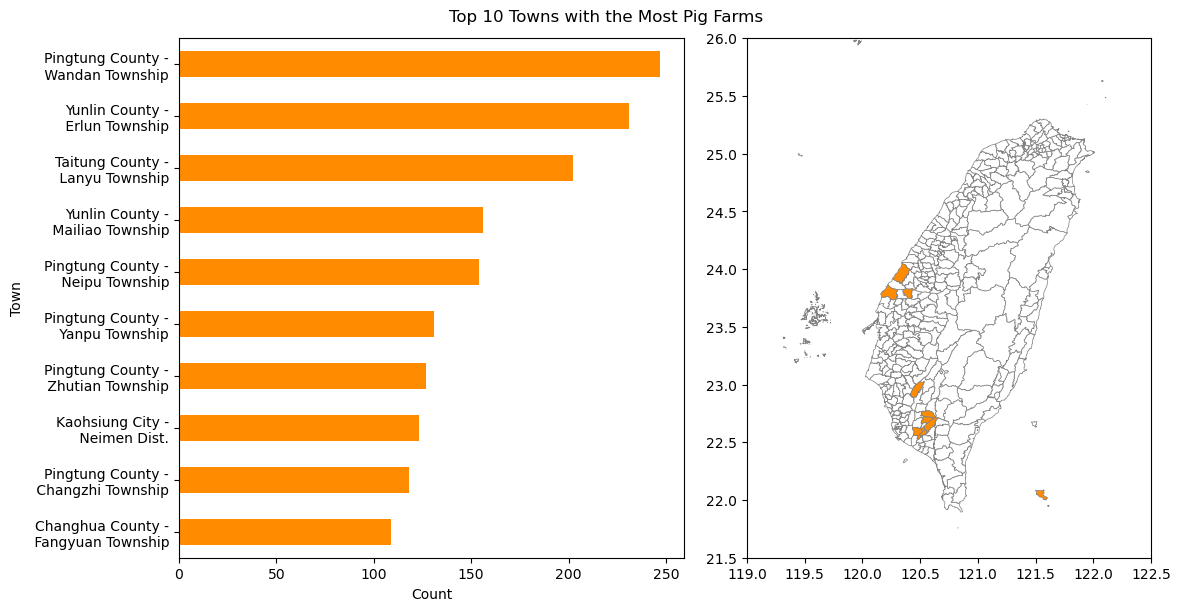

In [23]:
# Top 10 towns with most pig / cow farms
fig, ax = plt.subplots(1, 2, figsize = (20, 10), constrained_layout = True)
top5_pig = mergeData.sort_values('pigFarm', ascending = True).tail(10)
top5_pig['city_town'] = top5_pig['city/county'] + ' -\n ' + top5_pig['town']
top5_pig.loc[:, ['city_town','town', 'pigFarm' ]].plot(ax = ax[0], kind = 'barh', x = 'city_town', color = 'darkOrange', figsize = (12, 6), legend = False)
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Town')
plt.suptitle('Top 10 Towns with the Most Pig Farms')

mergeData_g = gpd.GeoDataFrame(mergeData, geometry=mergeData['geometry'])
top5_pig_g = gpd.GeoDataFrame(top5_pig, geometry = top5_pig['geometry'])
mergeData_g['highlight'] = mergeData_g['town'].isin(top5_pig_g['town']).astype(int)
custom_cmap = LinearSegmentedColormap.from_list("light_to_orange", ["#FFFFFF", "#FF8C00"])
mergeData_g.plot(
    ax=ax[1],
    column='highlight',
    cmap= custom_cmap,  # Base color for all areas 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r'
    edgecolor='gray',  # Black edges for all areas
    linewidth=0.5       # Edge width
)
ax[1].set_xlim(119, 122.5)  # Adjust longitude range
ax[1].set_ylim(21.5, 26)    # Adjust latitude range

plt.show()

(2) 10 Towns with the highest / lowest No. 18 issue agree rate

(21.5, 26.0)

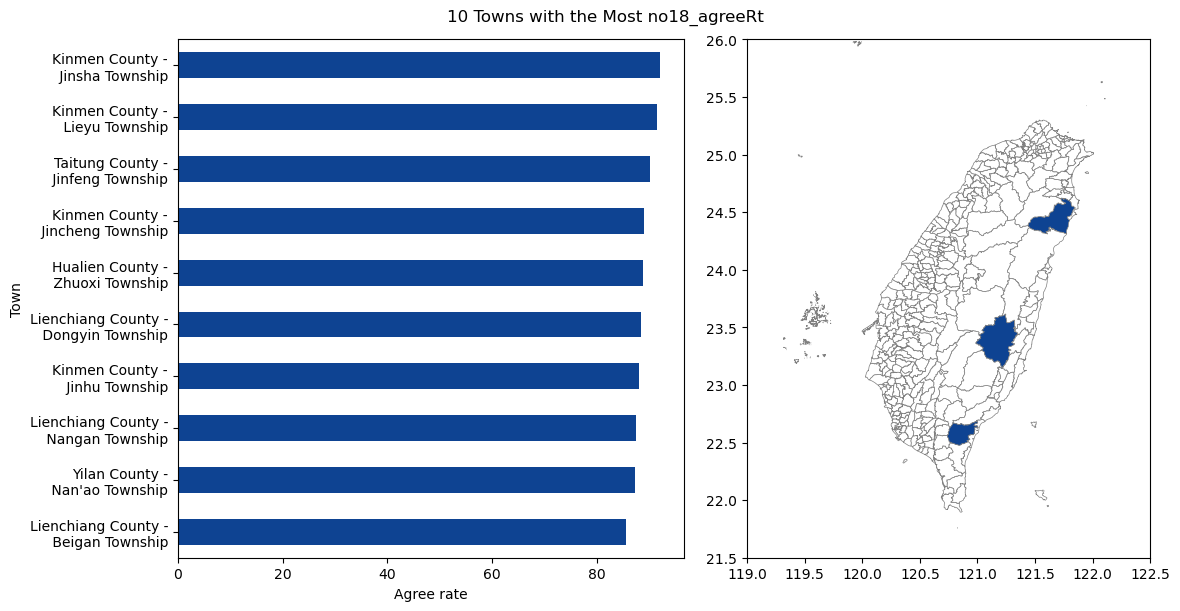

In [24]:
# Top 10 Town for No.18 AgreeRt
# Ensure the column 'no18_agreeRt' is numeric
mergeData['no18_agreeRt'] = pd.to_numeric(mergeData['no18_agreeRt'], errors='coerce')
fig, ax = plt.subplots(1, 2, figsize = (20, 10), constrained_layout = True)
top_10_18a = mergeData.sort_values('no18_agreeRt', ascending = True).tail(10)
top_10_18a['city_town'] = top_10_18a['city/county'] + ' -\n ' + top_10_18a['town']
top_10_18a.loc[:, ['city_town','town', 'no18_agreeRt' ]].plot(ax = ax[0], kind = 'barh', x ='city_town', color ='#0E4392', figsize = (12, 6), legend = False)
ax[0].set_xlabel('Agree rate')
ax[0].set_ylabel('Town')
plt.suptitle('10 Towns with the Most no18_agreeRt')
mergeData_g = gpd.GeoDataFrame(mergeData, geometry=mergeData['geometry'])
top_10_18a_g = gpd.GeoDataFrame(top_10_18a, geometry = top_10_18a['geometry'])
mergeData_g['highlight'] = mergeData_g['town'].isin(top_10_18a_g['town']).astype(int)
custom_cmap = LinearSegmentedColormap.from_list("light_to_blue", ["#FFFFFF", "#0E4392"])
mergeData_g.plot(
ax = ax[1],
column='highlight',
cmap= custom_cmap, # Base color for all areas 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r'
edgecolor='gray', # Black edges for all areas
linewidth=0.5 # Edge width
)
ax[1].set_xlim(119, 122.5) # Adjust longitude range
ax[1].set_ylim(21.5, 26) # Adjust latitude range

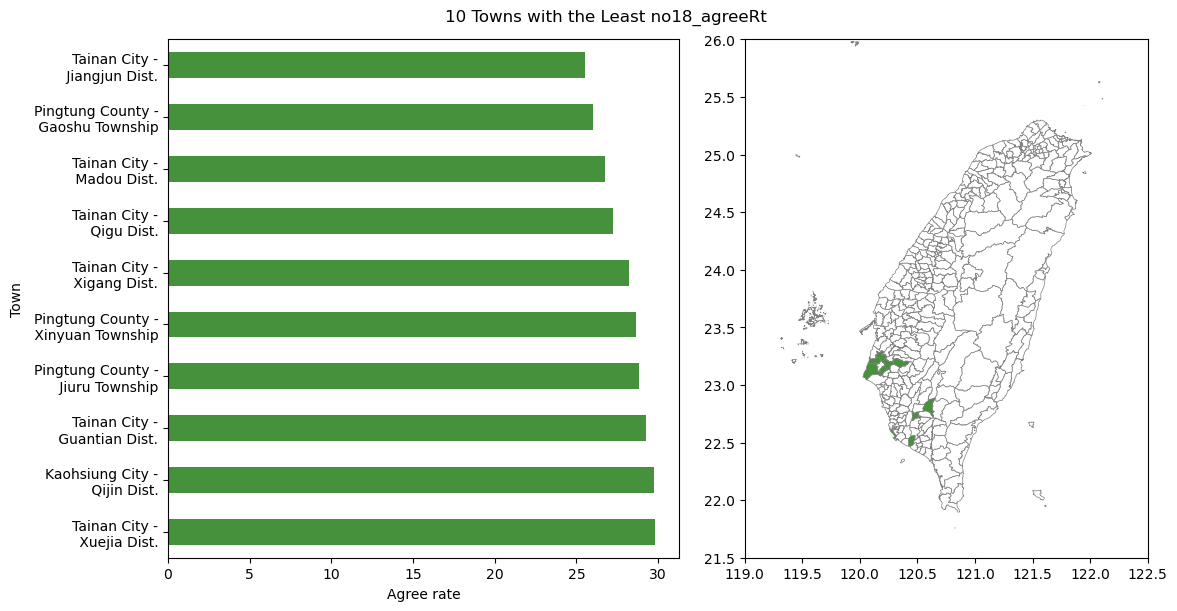

In [25]:
# Bottom 10 Town for No.18 AgreeRt
fig, ax = plt.subplots(1, 2, figsize = (20, 10), constrained_layout = True)
bottom_10_18a = mergeData.sort_values('no18_agreeRt', ascending = False).tail(10)
bottom_10_18a['city_town'] = bottom_10_18a['city/county'] + ' -\n ' + bottom_10_18a['town']
bottom_10_18a.loc[:, ['city_town','town', 'no18_agreeRt' ]].plot(ax = ax[0], kind = 'barh', x ='city_town', color ='#46923C', figsize = (12, 6), legend = False)
ax[0].set_xlabel('Agree rate')
ax[0].set_ylabel('Town')
plt.suptitle('10 Towns with the Least no18_agreeRt')
mergeData_g = gpd.GeoDataFrame(mergeData, geometry=mergeData['geometry'])
bottom_10_18a_g = gpd.GeoDataFrame(bottom_10_18a, geometry = top_10_18a['geometry'])
mergeData_g['highlight'] = mergeData_g['town'].isin(bottom_10_18a_g['town']).astype(int)
custom_cmap = LinearSegmentedColormap.from_list("light_to_green", ["#FFFFFF","#46923C"])
mergeData_g.plot(ax=ax[1], column='highlight', cmap= custom_cmap, edgecolor='gray', linewidth=0.5)
ax[1].set_xlim(119, 122.5) # Adjust longitude range
ax[1].set_ylim(21.5, 26) # Adjust latitude range
plt.show()

#### b. Numbers of pig and cow farms and agree rates

To look into our first hypothesis, that there is a positive relationship between the number of pig farms and the agreement rate of the pork import ban, and second, that there is a negative relationship between the number of cow farms and the agreement rate of the pork import ban, we created two scatter plots to visualize these relationships.

In [26]:
mergeData.loc[:, ['city/county', 'town', 'no17_agreeVotes', 'no17_disagreeVotes','no17_validVotes', 'no17_agreeRt', 'no17_disagreeRt',
                  'no18_agreeVotes', 'no18_disagreeVotes','no18_validVotes', 'no18_agreeRt', 'no18_disagreeRt' ,
                  'no19_agreeVotes', 'no19_disagreeVotes','no19_validVotes', 'no19_agreeRt', 'no19_disagreeRt',
                  'no20_agreeVotes', 'no20_disagreeVotes','no20_validVotes', 'no20_agreeRt', 'no20_disagreeRt']].head()

,city/county,town,no17_agreeVotes,no17_disagreeVotes,no17_validVotes,no17_agreeRt,no17_disagreeRt,no18_agreeVotes,no18_disagreeVotes,no18_validVotes,no18_agreeRt,no18_disagreeRt,no19_agreeVotes,no19_disagreeVotes,no19_validVotes,no19_agreeRt,no19_disagreeRt,no20_agreeVotes,no20_disagreeVotes,no20_validVotes,no20_agreeRt,no20_disagreeRt
0,Taipei City,Zhongshan Dist.,41082,45181,86263.0,47.624126,52.375874,42674,43672,86346.0,49.422093,50.577907,43325,42997,86322.0,50.189986,49.810014,42506,43710,86216.0,49.301754,50.698246
1,Taipei City,Zhongzheng Dist.,31561,27558,59119.0,53.385544,46.614456,32866,26315,59181.0,55.534716,44.465284,33267,25936,59203.0,56.191409,43.808591,32806,26507,59313.0,55.309966,44.690034
2,Taipei City,Xinyi Dist.,45522,38628,84150.0,54.096257,45.903743,47128,37152,84280.0,55.918367,44.081633,47678,36581,84259.0,56.585053,43.414947,47038,37163,84201.0,55.863945,44.136055
3,Taipei City,Neihu Dist.,56881,50236,107117.0,53.101749,46.898251,58760,48423,107183.0,54.822127,45.177873,59494,47701,107195.0,55.500723,44.499277,58719,48325,107044.0,54.855013,45.144987
4,Taipei City,Beitou Dist.,44293,49794,94087.0,47.076642,52.923358,46125,48205,94330.0,48.897488,51.102512,46388,47741,94129.0,49.281305,50.718695,46036,48002,94038.0,48.954678,51.045322


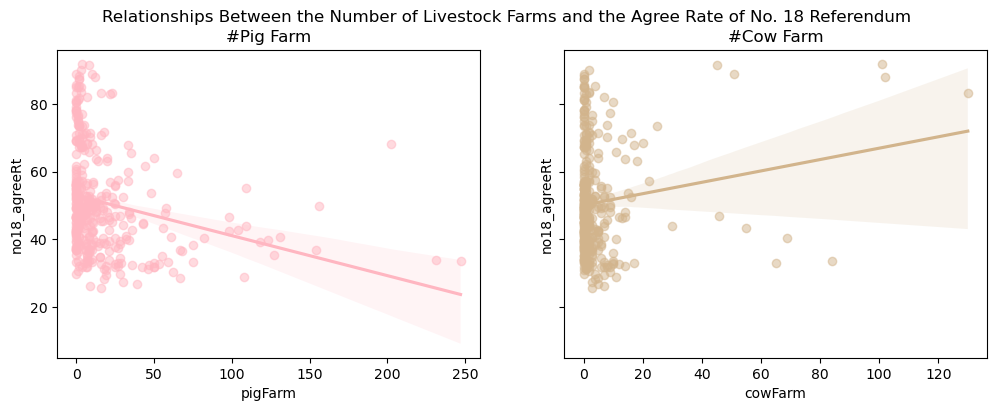

In [27]:
# Plotting relationships between the number of livestock farms (pig & cow) and the support rate of no18 referendum(Agree to oppose importing pork with)
mergeData['pigFarm'] = mergeData['pigFarm'].astype(int)
mergeData['cowFarm'] = mergeData['cowFarm'].astype(int)
mergeData['pigFarmPercent'] = mergeData['pigFarmPercent'].astype(float)
mergeData['cowFarmPercent'] = mergeData['cowFarmPercent'].astype(float)

fig, axis = plt.subplots(1, 2, figsize = (12,4), sharey=True)
fig.suptitle('Relationships Between the Number of Livestock Farms and the Agree Rate of No. 18 Referendum')

pigrt = sns.regplot(ax = axis[0],
                    data = mergeData,
                    x = 'pigFarm', y = 'no18_agreeRt',
                    color = 'lightpink',
                    scatter_kws = {'alpha': 0.5})
axis[0].set_title('#Pig Farm')

cowrt = sns.regplot(ax = axis[1],
                    data = mergeData,
                    x = 'cowFarm', y = 'no18_agreeRt',
                    color = 'tan',
                    scatter_kws = {'alpha': 0.5} )
axis[1].set_title('#Cow Farm')

# pigrt = sns.regplot(ax = axis[1, 0],
#                     data = mergeData,
#                     x = 'pigFarmPercent', y = 'no18_agreeRt',
#                     color = 'lightpink',
#                     scatter_kws = {'alpha': 0.5})
# axis[1, 0].set_title('Pig Farm%')

# cowrt = sns.regplot(ax = axis[1, 1],
#                     data = mergeData,
#                     x = 'cowFarmPercent', y = 'no18_agreeRt',
#                     color = 'tan',
#                     scatter_kws = {'alpha': 0.5} )
# axis[1, 1].set_title('Cow Farm%')
plt.show()


The results are exactly the opposite of our first and second hypothesis on the relationship between the number of livestock farms and the support rate of no.18 issue. A negative relationship is observed between the number of pig farm and the support rate of no.18 issue, while a positive relationship is observed between the number of cow farm and the support rate of no.18 issue.

We continued to explore the relationship between the number of pig /cow farms and the agree rate of No.18 issues as we're trying to find out whether individuals are independently evaluating and forming positions on each issue.

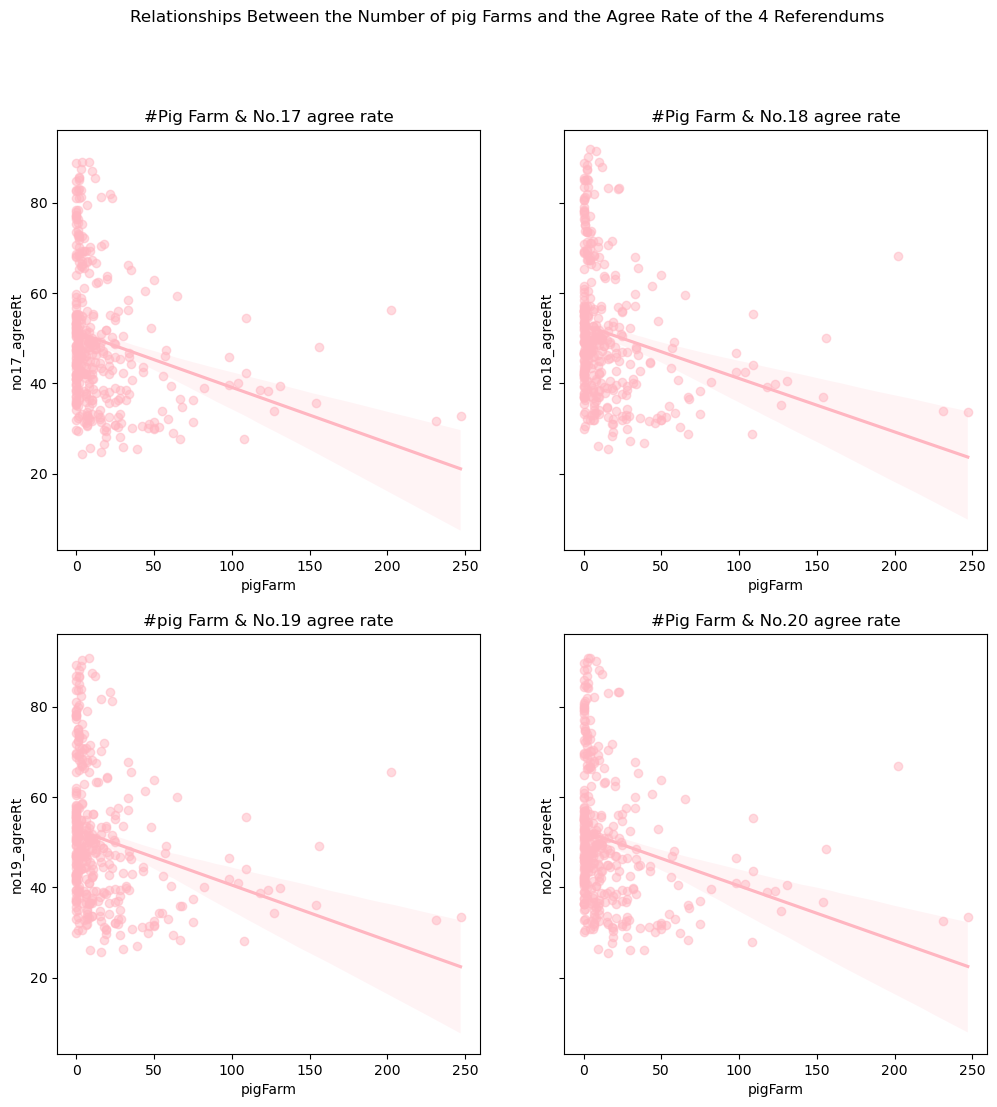

In [28]:
fig, axis = plt.subplots(2, 2, figsize = (12,12), sharey=True)
fig.suptitle('Relationships Between the Number of pig Farms and the Agree Rate of the 4 Referendums')

pigrt = sns.regplot(ax = axis[0, 0],
                    data = mergeData,
                    x = 'pigFarm', y = 'no17_agreeRt',
                    color = 'lightpink',
                    scatter_kws = {'alpha': 0.5})
axis[0, 0].set_title('#Pig Farm & No.17 agree rate')

pigrt = sns.regplot(ax = axis[0, 1],
                    data = mergeData,
                    x = 'pigFarm', y = 'no18_agreeRt',
                    color = 'lightpink',
                    scatter_kws = {'alpha': 0.5})
axis[0, 1].set_title('#Pig Farm & No.18 agree rate')

cowrt = sns.regplot(ax = axis[1 ,0],
                    data = mergeData,
                    x = 'pigFarm', y = 'no19_agreeRt',
                    color = 'lightpink',
                    scatter_kws = {'alpha': 0.5} )
axis[1, 0].set_title('#pig Farm & No.19 agree rate')

pigrt = sns.regplot(ax = axis[1, 1],
                    data = mergeData,
                    x = 'pigFarm', y = 'no20_agreeRt',
                    color = 'lightpink',
                    scatter_kws = {'alpha': 0.5})
axis[1, 1].set_title('#Pig Farm & No.20 agree rate')
plt.show()

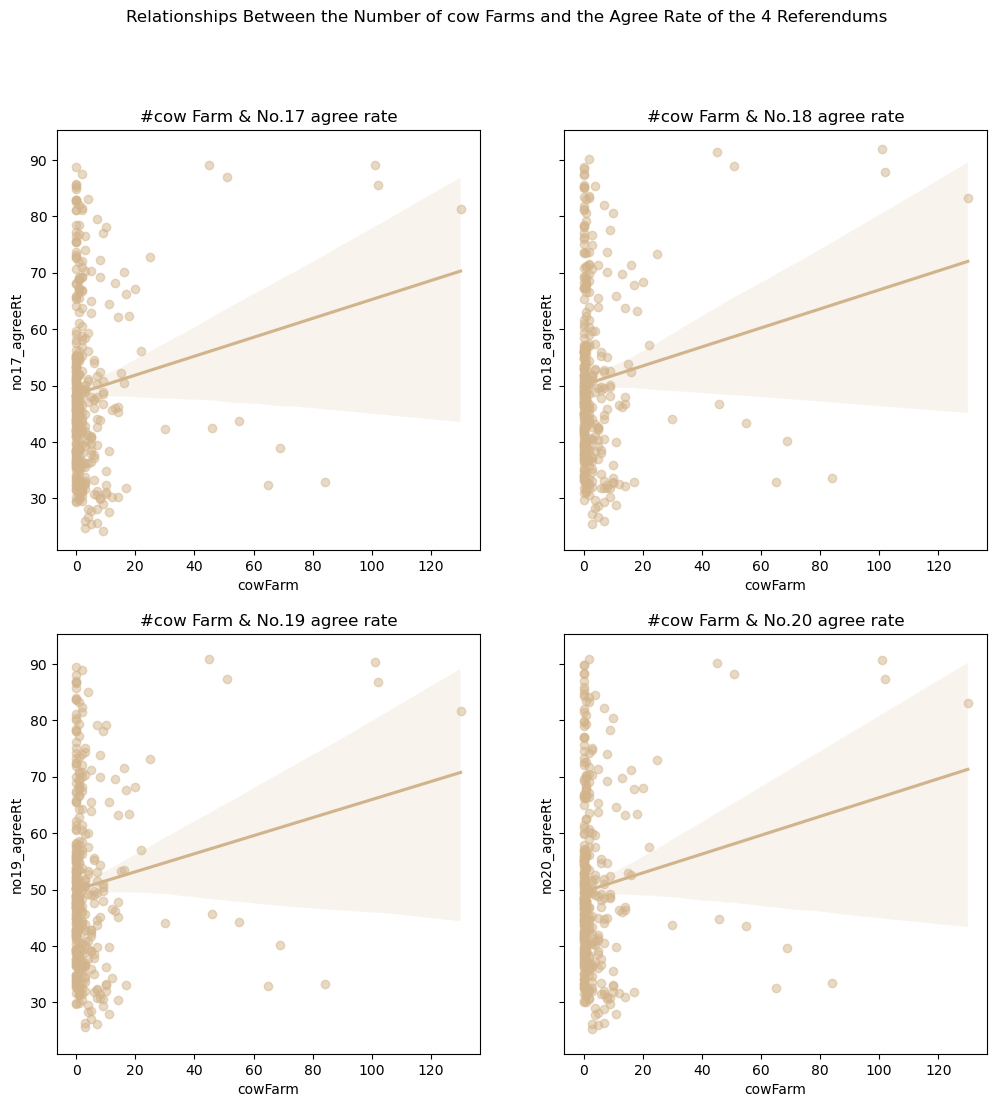

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (12,12), sharey=True)
fig.suptitle('Relationships Between the Number of cow Farms and the Agree Rate of the 4 Referendums')

pigrt = sns.regplot(ax = axis[0, 0],
                    data = mergeData,
                    x = 'cowFarm', y = 'no17_agreeRt',
                    color = 'tan',
                    scatter_kws = {'alpha': 0.5})
axis[0, 0].set_title('#cow Farm & No.17 agree rate')

pigrt = sns.regplot(ax = axis[0, 1],
                    data = mergeData,
                    x = 'cowFarm', y = 'no18_agreeRt',
                    color = 'tan',
                    scatter_kws = {'alpha': 0.5})
axis[0, 1].set_title('#cow Farm & No.18 agree rate')

cowrt = sns.regplot(ax = axis[1 ,0],
                    data = mergeData,
                    x = 'cowFarm', y = 'no19_agreeRt',
                    color = 'tan',
                    scatter_kws = {'alpha': 0.5} )
axis[1, 0].set_title('#cow Farm & No.19 agree rate')

pigrt = sns.regplot(ax = axis[1, 1],
                    data = mergeData,
                    x = 'cowFarm', y = 'no20_agreeRt',
                    color = 'tan',
                    scatter_kws = {'alpha': 0.5})
axis[1, 1].set_title('#cow Farm & No.20 agree rate')
plt.show()

The results indicate a similar pattern of relationship between the number of cow farms and the agreement rate across all four issues, leading us to question whether "party support" might be influencing people's positions on these referendum issues and test on our third and fourth hypotheses of whether a higher support rate of the ruling party (Demo Progressive) in a county resulted in the lower agree rates in four referendums, and a higher support rate of the main opposition party (Nationalist) in a county led to a higher agree rates in four referendums.

#### c. Party support and agree rates

To examine that, we created two scatter plots to observe the relationships.

In [30]:
#mergeData.loc[:, ['city/county', 'town','20pr_peopleFirst', '20pr_nationalist', '20pr_demoProgressive', '20pr_validVotes', '20pr_invalidVotes', '20pr_totVotes', '20pr_eligibleVoters', '20pr_voterTurnout']]
columns_to_convert = ['20pr_peopleFirst', '20pr_nationalist', '20pr_demoProgressive',
                      '20pr_validVotes', '20pr_invalidVotes', '20pr_totVotes', '20pr_eligibleVoters']
#mergeData.dtypes
mergeData.loc[:, columns_to_convert]
# Remove commas and convert to integer
for column in columns_to_convert:
    mergeData[column] = mergeData[column].str.replace(',', '').fillna(0).astype(int)

In [31]:
# Plotting relationships between the number of livestock farms (pig & cow) and the political landscape (Here, we only consider the support rates of the two major parties.)
#mergeData.loc[:, ['city/county', 'town','20pr_peopleFirst', '20pr_nationalist', '20pr_demoProgressive', '20pr_validVotes', '20pr_invalidVotes', '20pr_totVotes', '20pr_eligibleVoters', '20pr_voterTurnout']]
mergeData['supportRt_nationalist'] = mergeData.apply(lambda r: r['20pr_nationalist'] / r['20pr_validVotes'] * 100, axis = 1)
mergeData['supportRt_peopleFirst'] = mergeData.apply(lambda r: r['20pr_peopleFirst'] / r['20pr_validVotes'] * 100, axis = 1)
mergeData['supportRt_demoProgressive'] = mergeData.apply(lambda r: r['20pr_demoProgressive'] / r['20pr_validVotes'] * 100, axis = 1)
mergeData.loc[:, ['city/county', 'town', '20pr_nationalist', '20pr_demoProgressive','20pr_validVotes', 'supportRt_nationalist', 'supportRt_demoProgressive']].head()

,city/county,town,20pr_nationalist,20pr_demoProgressive,20pr_validVotes,supportRt_nationalist,supportRt_demoProgressive
0,Taipei City,Zhongshan Dist.,56491,79022,141880,39.816042,55.696363
1,Taipei City,Zhongzheng Dist.,41461,48183,93832,44.186418,51.350286
2,Taipei City,Xinyi Dist.,62353,70285,138516,45.015016,50.741431
3,Taipei City,Neihu Dist.,74437,94269,177062,42.040076,53.240673
4,Taipei City,Beitou Dist.,59851,90060,156354,38.279161,57.600061


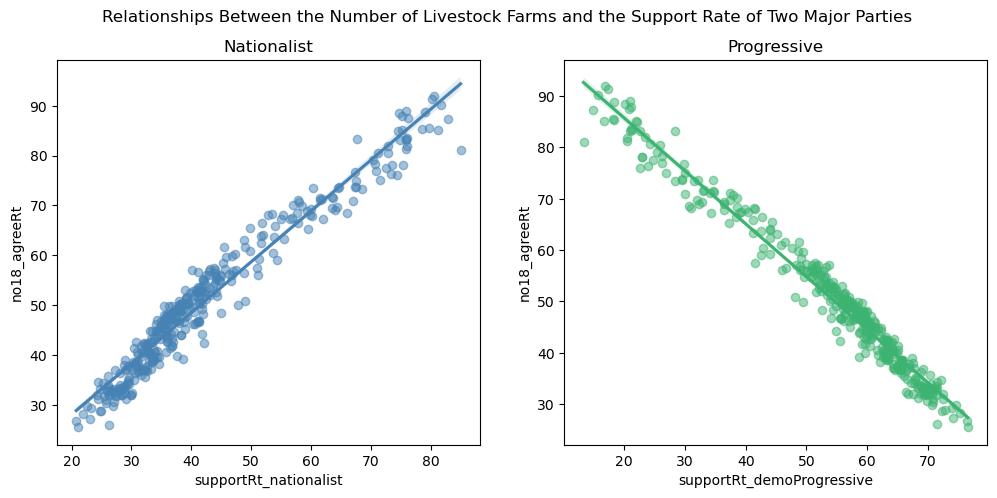

In [32]:
fig, axis = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle('Relationships Between the Number of Livestock Farms and the Support Rate of Two Major Parties')
#mergeData.plot(ax = axis[0], kind = 'scatter', x = 'supportRt_nationalist', y = 'no18_agreeRt')
sns.regplot(ax = axis[0],data = mergeData, x = 'supportRt_nationalist', y = 'no18_agreeRt', color = 'steelblue', scatter_kws = {'alpha': 0.5})
axis[0].set_title('Nationalist')
#mergeData.plot(ax = axis[1], kind = 'scatter', x = 'supportRt_demoProgressive', y = 'no18_agreeRt')
sns.regplot(ax = axis[1],data = mergeData, x = 'supportRt_demoProgressive', y = 'no18_agreeRt', color = 'mediumseagreen', scatter_kws = {'alpha': 0.5})
axis[1].set_title('Progressive')
plt.show()

The results reveal a strong relationship between the agreement rate on Issue No. 18 and the support rates for the two major parties. Specifically, there is a positive correlation with the support rate for the Nationalist Party and a negative correlation with the support rate for the Progressive Party, indicating a significant alignment between party support and individuals' stances on this referendum issue and possibly other issues too.

We then visualized the political landscape, the agreement rate on Issue No. 18, and the number of pig farms in each town on a map to better understand the spatial relationships and potential regional patterns influencing the referendum outcomes.

In [33]:
mergeData_g = gpd.GeoDataFrame(mergeData, geometry=mergeData['geometry'])

In [34]:
mergeData_g['party'] = mergeData_g.apply(lambda r: 'steelblue' if r['supportRt_nationalist'] > r['supportRt_demoProgressive'] else 'mediumseagreen',axis = 1)
mergeData_g['nToD'] = mergeData.apply(lambda r: r['20pr_nationalist'] / r['20pr_demoProgressive'], axis = 1)

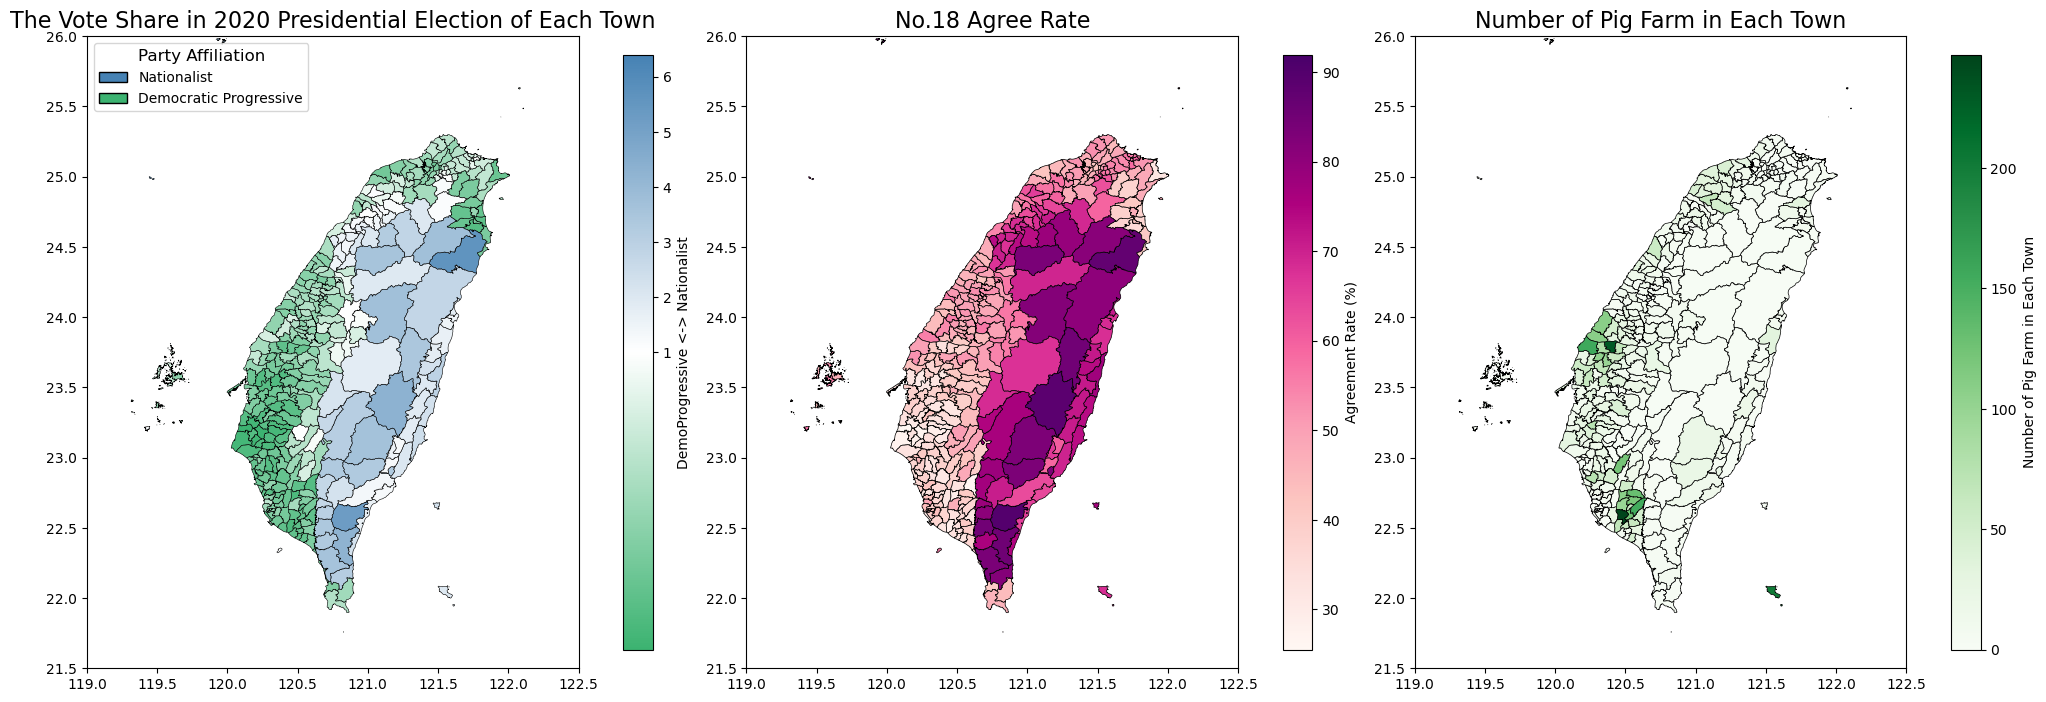

In [50]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10), constrained_layout = True)
# mergeData_g.plot(ax = ax[0], column = 'party', color = mergeData_g['party'], edgecolor = 'black', linewidth = 0.4)
legend_elements = [
    Patch(facecolor='steelblue', edgecolor='black', label='Nationalist'),
    Patch(facecolor='mediumseagreen', edgecolor='black', label='Democratic Progressive')
]
ax[0].legend(handles = legend_elements, title = "Party Affiliation", loc = 'upper left', fontsize = 10, title_fontsize = 12)
custom_diverging = LinearSegmentedColormap.from_list("BlueWhiteGreen", ["mediumseagreen", "white", "steelblue"])
norm = TwoSlopeNorm(vmin = mergeData_g['nToD'].min(), vcenter = 1, vmax = mergeData_g['nToD'].max())
mergeData_g.plot(ax = ax[0], column = 'nToD', cmap = custom_diverging, edgecolor = 'black', linewidth = 0.4, norm = norm, legend = True, legend_kwds = {'label': "DemoProgressive <-> Nationalist", 'orientation': "vertical", 'shrink': 0.6})
ax[0].set_title('The Vote Share in 2020 Presidential Election of Each Town', fontsize = 16)

mergeData_g.plot(ax = ax[1], column='no18_agreeRt', cmap='RdPu', edgecolor='black', linewidth=0.5, legend=True, legend_kwds={'label': "Agreement Rate (%)", 'orientation': "vertical", 'shrink': 0.6})
ax[1].set_title('No.18 Agree Rate', fontsize = 16)

mergeData_g.plot(ax = ax[2], column='pigFarm', cmap='Greens', edgecolor='black', linewidth=0.5, legend=True, legend_kwds={'label': "Number of Pig Farm in Each Town", 'orientation': "vertical", 'shrink': 0.6})
ax[2].set_title('Number of Pig Farm in Each Town', fontsize = 16)
for a in ax:
    a.set_xlim(119, 122.5)  # Adjust longitude range
    a.set_ylim(21.5, 26)    # Adjust latitude range
    a.set_aspect('equal')
plt.show()

The graphs show a relatively strong relationship between political affiliation and the stance on Issue No. 18, as demonstrated by the alignment of agreement rates with the political leanings of each town.  In contrast, the distribution of pig farms does not show a clear or significant relationship with the stance on Issue No. 18, indicating that political factors are likely to play a more dominant role in shaping opinions on this issue.

#### d. Linear Regression Model

Lastly, we developed a regression model to test the impact of each variable on the agreement rate for Issue No. 18. This approach allowed us to quantitatively assess the relative influence of factors such as political affiliation, the number of pig farms, and other potential contributors to the agreement rate.

In [36]:
def p_calculator(X, Y, model):
    residuals = Y - model.predict(X)
    n, k = X.shape
    RSS = np.sum(residuals**2)
    variance = RSS / (n - k - 1)

    # Compute the covariance matrix of the coefficients
    X_with_intercept = np.column_stack([np.ones(n), X])
    cov_matrix = variance * np.linalg.inv(X_with_intercept.T @ X_with_intercept)

    # Calculate t-statistics (coefficients / standard error)
    standard_errors = np.sqrt(np.diag(cov_matrix))
    t_stats = model.coef_ / standard_errors[1:]

    # Calculate p-values
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n - k - 1))

    # demonstrate the significant levels
    sigStar = []
    for item in p_values:
        if item < 0.001:
            sigStar.append('***')
        elif item < 0.01:
            sigStar.append('**')
        elif item < 0.05:
            sigStar.append('*')
        else:
            sigStar.append('')

    return p_values, sigStar

In [37]:
def regressionSKL(x, y, IVname):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    coefficients = model.coef_.tolist()
    intercept = model.intercept_.tolist()

    n, k = x.shape
    p_values, sigStar = p_calculator(x, y, model)

    # calculate log-likelihood
    residuals = y - y_pred
    sigma_squared = np.var(residuals, ddof=1)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma_squared) - (1/(2 * sigma_squared)) * np.sum(residuals**2)
    likelihood = np.exp(log_likelihood)

    # standard error
    residual_variance = np.sum(residuals**2) / (n - k - 1)
    X_design = np.hstack([np.ones((n, 1)), x])
    XtX_inv = np.linalg.inv(X_design.T @ X_design)
    var_cov_matrix = residual_variance * XtX_inv

    standard_errors = np.sqrt(np.diag(var_cov_matrix))

    z_score = 1.96
    lower_ci = coefficients - z_score * standard_errors[1:]
    upper_ci = coefficients + z_score * standard_errors[1:]

    # Adjusted R-squared
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    # Adjusted R-squared
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print(f"sample size: {n}")
    print(f"Intercept: {intercept:.4f}")
    print(f"{'Variable':<30}{'Coefficient':<15}{'P-value':<13}{'Significance':<8}")
    for idx, item in enumerate(coefficients):
        print(f"{IVname[idx]:<30}{round(item, 4):<15}{round(p_values[idx], 4):<13}{sigStar[idx]:<8}")
    print(f"R2 = {r2_score(y, y_pred):.4f}")
    print(f"Adjusted R2 = {adj_r2:.4f}")
    print(f"Log-Likelihood: {log_likelihood:.4f}")

    return coefficients, lower_ci, upper_ci

In [38]:
def regressionPlot(coef, lower, upper, IVname):
    plt.figure(figsize=(8, 6))
    y_positions = np.arange(len(coef))[::-1]
    variableLabel = IVname
    for i, (coef, low, up, label) in enumerate(zip(coef, lower, upper, variableLabel)):
        plt.errorbar(coef, y_positions[i], xerr=[[coef - low], [up - coef]], fmt='o', label=label)
    plt.title('OLS model')
    plt.yticks([])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend(title="variables", loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.axvline(x=0, color="red", linestyle="--", label="No Effect")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show()


-------------------------------model 1------------------------------------
sample size: 368
Intercept: 216.6146
Variable                      Coefficient    P-value      Significance
pigFarm                       -0.1334        0.0          ***     
cowFarm                       0.2505         0.0          ***     
postSecondaryRt               -0.5952        0.0008       ***     
avgIncome                     0.0            0.0005       ***     
femaleRT                      -2.7207        0.0          ***     
OldAgeRT                      -1.7927        0.0          ***     
Population Density            0.0003         0.0725               
R2 = 0.3674
Adjusted R2 = 0.3551
Log-Likelihood: -1437.9539
--------------------------------------------------------------------------


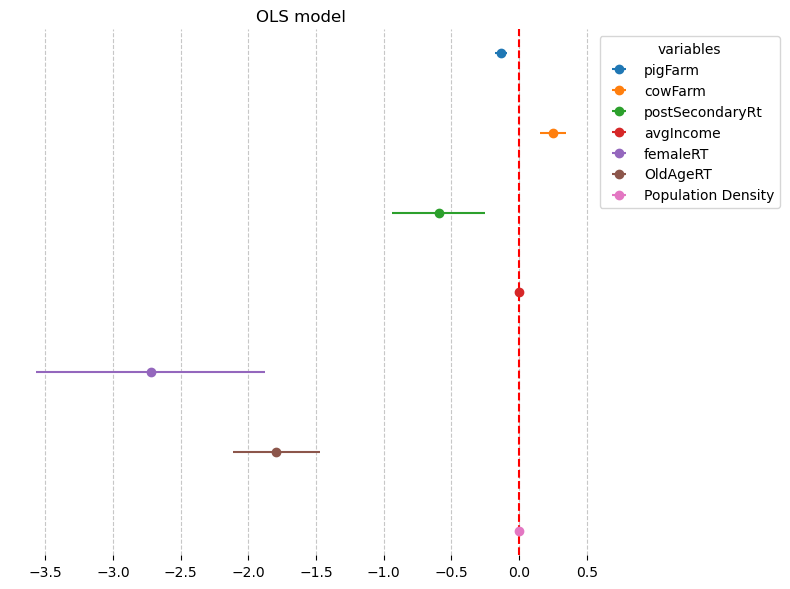

-------------------------------model 2------------------------------------
sample size: 368
Intercept: 8.2565
Variable                      Coefficient    P-value      Significance
pigFarm                       -0.0023        0.6427               
cowFarm                       0.0061         0.5916               
postSecondaryRt               0.2664         0.0          ***     
supportRt_nationalist         1.0277         0.0          ***     
avgIncome                     -0.0           0.3357               
femaleRT                      -0.1175        0.2385               
OldAgeRT                      -0.086         0.039        *       
Population Density            -0.0001        0.0068       **      
R2 = 0.9696
Adjusted R2 = 0.9689
Log-Likelihood: -879.2999
--------------------------------------------------------------------------


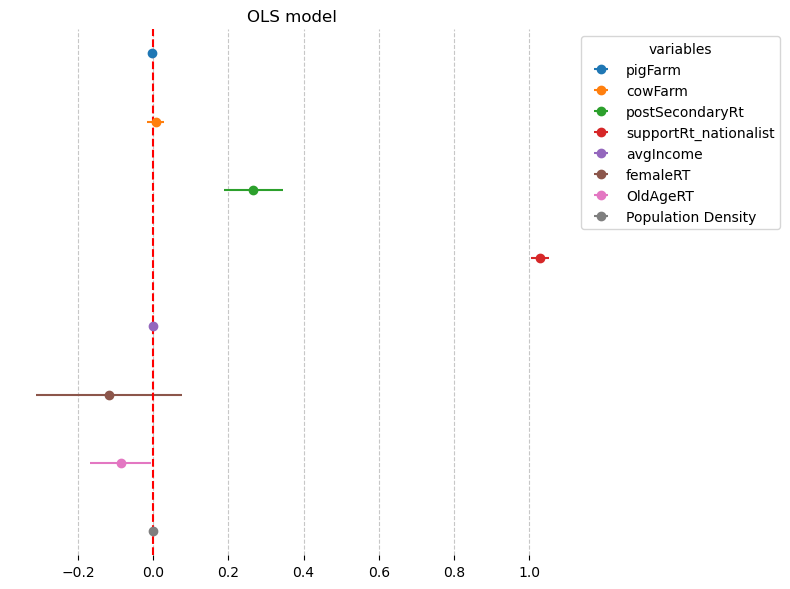

-------------------------------model 3------------------------------------
sample size: 368
Intercept: 106.3599
Variable                      Coefficient    P-value      Significance
pigFarmPercent                -0.0972        0.6898               
cowFarmPercent                0.2129         0.1614               
postSecondaryRt               0.2273         0.0          ***     
supportRt_demoProgressive     -1.0346        0.0          ***     
avgIncome                     -0.0           0.1177               
femaleRT                      -0.084         0.2885               
OldAgeRT                      -0.0418        0.2067               
Population Density            -0.0001        0.0036       **      
R2 = 0.9809
Adjusted R2 = 0.9805
Log-Likelihood: -794.1440
--------------------------------------------------------------------------


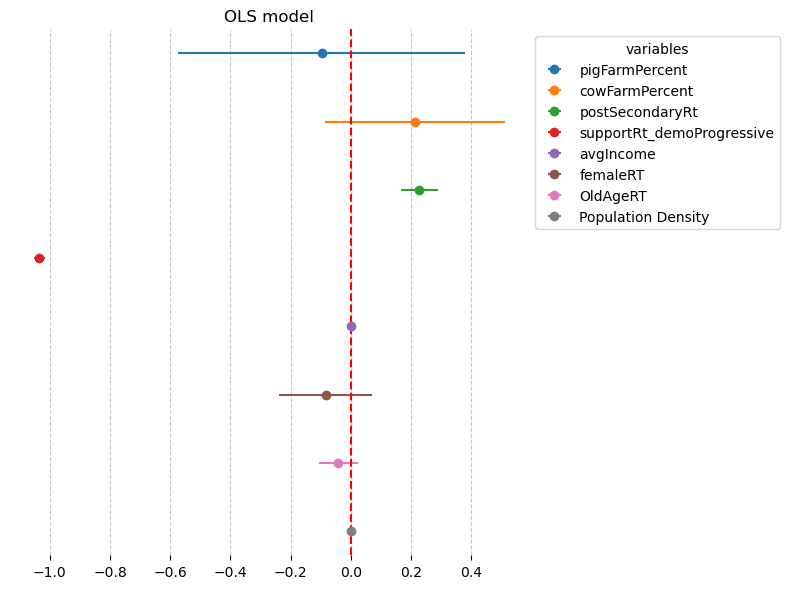

-------------------------------model 4------------------------------------
sample size: 368
Intercept: 208.4127
Variable                      Coefficient    P-value      Significance
pigFarmPercent                -8.4345        0.0          ***     
cowFarmPercent                4.5268         0.0          ***     
postSecondaryRt               -0.6886        0.0001       ***     
supportRt_peopleFirst         2.146          0.0034       **      
avgIncome                     0.0            0.0006       ***     
femaleRT                      -2.6875        0.0          ***     
OldAgeRT                      -1.7249        0.0          ***     
Population Density            0.0003         0.0427       *       
R2 = 0.3823
Adjusted R2 = 0.3685
Log-Likelihood: -1433.5625
--------------------------------------------------------------------------


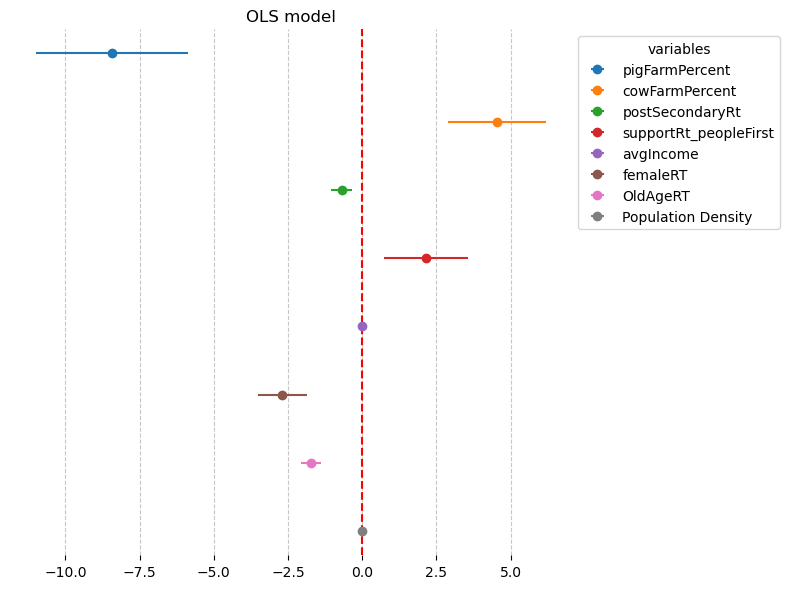

In [39]:
mergeData['WorkingAgeRT'] = mergeData['WorkingAgePopulation'] / mergeData['population'] * 100
mergeData['OldAgeRT'] = mergeData['OldAgePopulation'] / mergeData['population'] * 100

IVname1 = ['pigFarm', 'cowFarm', 'postSecondaryRt', 'avgIncome', 'femaleRT', 'OldAgeRT', 'Population Density']
IVname2 = ['pigFarm', 'cowFarm', 'postSecondaryRt', 'supportRt_nationalist',
               'avgIncome', 'femaleRT', 'OldAgeRT', 'Population Density']
IVname3 = ['pigFarmPercent', 'cowFarmPercent', 'postSecondaryRt', 'supportRt_demoProgressive',
               'avgIncome', 'femaleRT', 'OldAgeRT', 'Population Density']
IVname4 = ['pigFarmPercent', 'cowFarmPercent', 'postSecondaryRt', 'supportRt_peopleFirst',
               'avgIncome', 'femaleRT', 'OldAgeRT', 'Population Density']

x1 = mergeData[IVname1]
x2 = mergeData[IVname2]
x3 = mergeData[IVname3]
x4 = mergeData[IVname4]
y = mergeData['no18_agreeRt']

print("-------------------------------model 1------------------------------------")
coefficients, lower_ci, upper_ci = regressionSKL(x1, y, IVname1)
print("--------------------------------------------------------------------------")
regressionPlot(coefficients, lower_ci, upper_ci, IVname1)

print("-------------------------------model 2------------------------------------")
coefficients, lower_ci, upper_ci = regressionSKL(x2, y, IVname2)
print("--------------------------------------------------------------------------")
regressionPlot(coefficients, lower_ci, upper_ci, IVname2)

print("-------------------------------model 3------------------------------------")
coefficients, lower_ci, upper_ci = regressionSKL(x3, y, IVname3)
print("--------------------------------------------------------------------------")
regressionPlot(coefficients, lower_ci, upper_ci, IVname3)
print("-------------------------------model 4------------------------------------")
coefficients, lower_ci, upper_ci = regressionSKL(x4, y, IVname4)
print("--------------------------------------------------------------------------")
regressionPlot(coefficients, lower_ci, upper_ci, IVname4)

In Model 1, we found that the coefficient for the number of pig farms is significantly negative, suggesting that an increase in pig farms is associated with a decrease in the agreement rate for Issue No. 18. Conversely, the coefficient for the number of cow farms is significantly positive, indicating that a higher number of cow farms corresponds to an increase in the agreement rate. These findings align with our inferences from the scatter plots. Additionally, significant relationships were observed for education level, income, gender, and age.

However, in model 3, after including the support rates of the two major parties as independent variables, the model's results shifted. The coefficient for the number of pig farms became statistically insignificant, suggesting that the previously observed relationship may be explained by the political support variables, which emerged as highly significant predictors. For other demographic variables, while education level (postSecondaryRt) and population density retained their significance, other variables, such as gender, age, and income, no longer show significant effects. 

### <b>7. References</b>

This part utilize visualizations to again validate what we found in the regression model. We now know that people's support rate on political parties is highly correlated to their stance on the referendum issues...

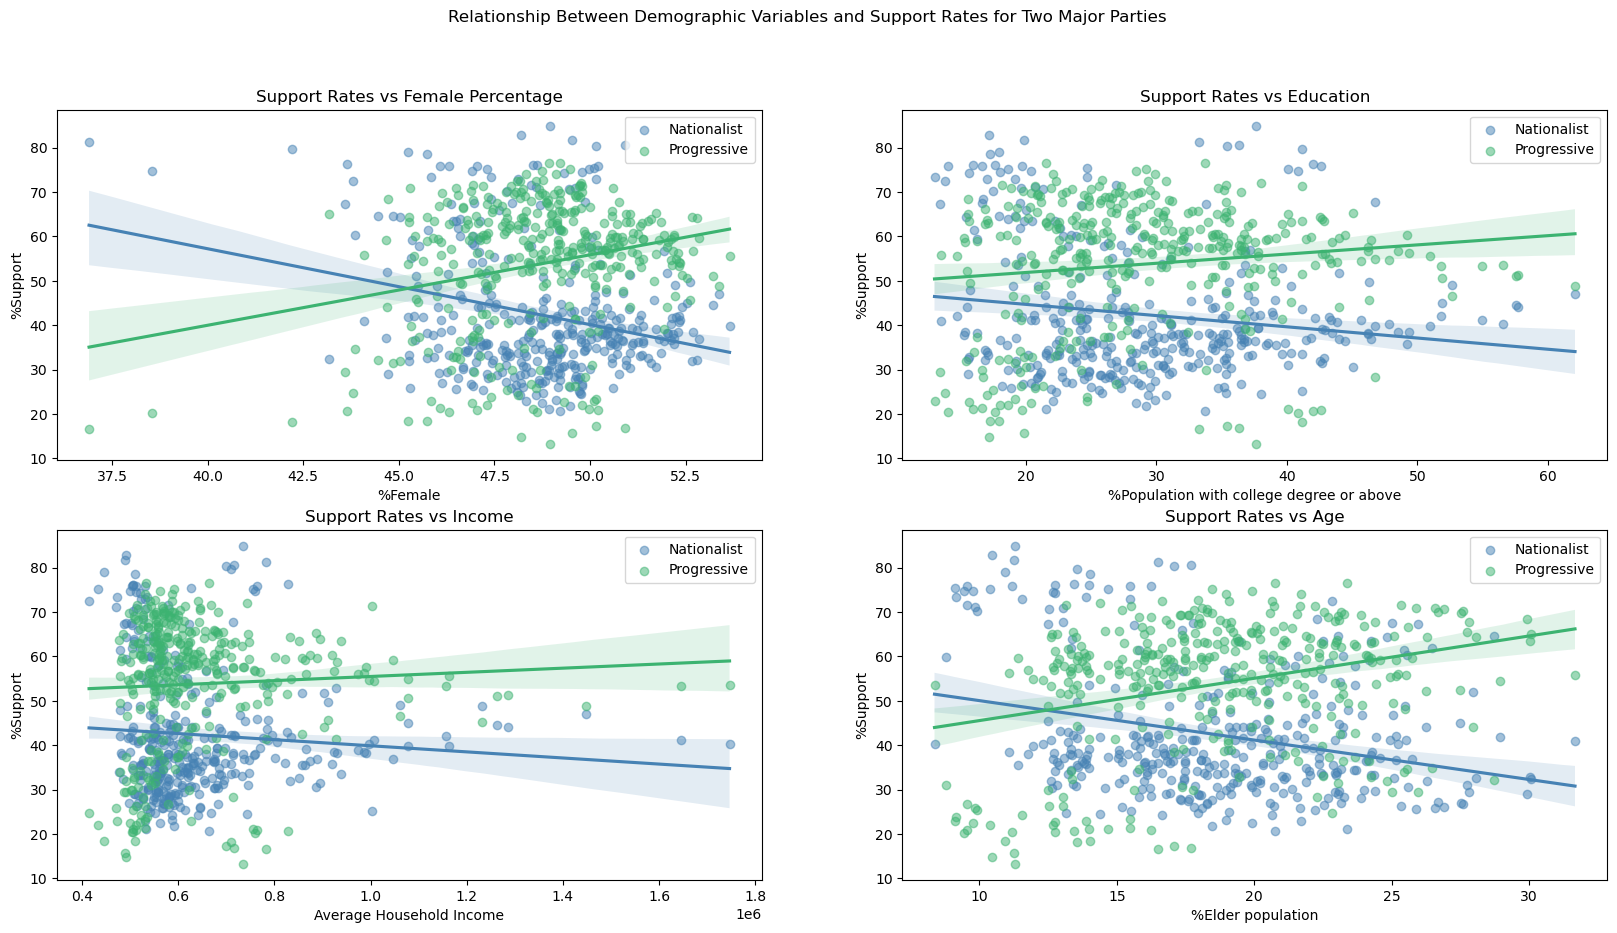

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Relationship Between Demographic Variables and Support Rates for Two Major Parties')

sns.regplot(
    ax=ax[0, 0],
    data=mergeData,
    x='femaleRT',
    y='supportRt_nationalist',
    color='steelblue',
    scatter_kws={'alpha': 0.5},
    label='Nationalist'
)
sns.regplot(
    ax=ax[0, 0],
    data=mergeData,
    x='femaleRT',
    y='supportRt_demoProgressive',
    color='mediumseagreen',
    scatter_kws={'alpha': 0.5},
    label='Progressive'
)
ax[0, 0].set_title('Support Rates vs Female Percentage')
ax[0, 0].set_xlabel("%Female")
ax[0, 0].set_ylabel('%Support')
ax[0, 0].legend()

sns.regplot(
    ax=ax[0, 1],
    data=mergeData,
    x='postSecondaryRt',
    y='supportRt_nationalist',
    color='steelblue',
    scatter_kws={'alpha': 0.5},
    label='Nationalist'
)
sns.regplot(
    ax=ax[0, 1],
    data=mergeData,
    x='postSecondaryRt',
    y='supportRt_demoProgressive',
    color='mediumseagreen',
    scatter_kws={'alpha': 0.5},
    label='Progressive'
)
ax[0, 1].set_title('Support Rates vs Education')
ax[0, 1].set_xlabel('%Population with college degree or above')
ax[0, 1].set_ylabel('%Support')
ax[0, 1].legend()

sns.regplot(
    ax=ax[1, 0],
    data=mergeData,
    x='avgIncome',
    y='supportRt_nationalist',
    color='steelblue',
    scatter_kws={'alpha': 0.5},
    label='Nationalist'
)
sns.regplot(
    ax=ax[1, 0],
    data=mergeData,
    x='avgIncome',
    y='supportRt_demoProgressive',
    color='mediumseagreen',
    scatter_kws={'alpha': 0.5},
    label='Progressive'
)
ax[1, 0].set_title('Support Rates vs Income')
ax[1, 0].set_xlabel('Average Household Income')
ax[1, 0].set_ylabel('%Support')
ax[1, 0].legend()

sns.regplot(
    ax=ax[1, 1],
    data=mergeData,
    x='OldAgeRT',
    y='supportRt_nationalist',
    color='steelblue',
    scatter_kws={'alpha': 0.5},
    label='Nationalist'
)
sns.regplot(
    ax=ax[1, 1],
    data=mergeData,
    x='OldAgeRT',
    y='supportRt_demoProgressive',
    color='mediumseagreen',
    scatter_kws={'alpha': 0.5},
    label='Progressive'
)
ax[1, 1].set_title('Support Rates vs Age')
ax[1, 1].set_xlabel('%Elder population')
ax[1, 1].set_ylabel('%Support')
ax[1, 1].legend()

plt.show()

In these plots, higher sex ratios appear to be associated with higher support for the Nationalist Party, while lower sex ratios seem to align with higher support for the Progressive Party. However, the trends are relatively weak, as the scatter points are widely dispersed, and the regression slopes are shallow. This could refer to the model, which shows that the female rate does not have a significant relationship with the agreement rate for the referendum.

### <b>8. Conclusion</b>

To wrap up, we return to the question we first posed: “Benefit or Loyalty?” From our analysis, we discovered that economic benefit plays a limited role in shaping individuals' policy attitudes. Instead, constituents' loyalty to political parties emerges as the primary driver of their opinions on referendum issues. These findings not only provide valuable insights into voter behavior in this context but also leave us curious about whether people in other countries exhibit similar patterns of political loyalty influencing their policy attitudes.